### <font color='white'> Simulation Processes Course. <font>

**Made by:**
[EstebanMqz](https://github.com/EstebanMqz)

**Date:** September 27, 2021.

**Repository**: https://github.com/EstebanMqz/MonteCarlo-Simulations
<font>
<br><br>
<font color= 'orange'>Simulations. 

##### <span style='color:red'> Project Creators:</span> Create requirements.txt file.<br>

In [1]:
#Import dependencies
import functions as fn
import data as dt
import visualizations as vs
import main
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
docstring = """
# -- ------------------------------------------------------------------------------------------------------------------------   -- # 
# -- project: MonteCarlo-Simulations                                                                                            -- # 
# -- script: requirements.txt: txt file to download Python modules for execution                                                -- # 
# -- author: EstebanMqz                                                                                                         -- # 
# -- license: CC BY 3.0                                                                                                         -- # 
# -- repository: https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/requirements.txt                                -- # 
# -- ------------------------------------------------------------------------------------------------------------------------   -- # 
\n
"""
fn.get_requirements(docstring)

requirements.txt file is created, it's in user's local path: c:\Users\Esteban\Desktop\Projects\Github\Repos_To-do\Languages\Python\Fin_Sim\Simulation_Course_Exams\MonteCarlo-Simulations\requirements.txt


##### <span style='color:green'> Project Users:</span> Install libraries in requirements.txt file.<br>

In [3]:
dt.library_install("requirements.txt")

Requirements installed.

# -- ------------------------------------------------------------------------------------------------------------------------   -- # 
# -- project: MonteCarlo-Simulations                                                                                            -- # 
# -- script: requirements.txt: txt file to download Python modules for execution                                                -- # 
# -- author: EstebanMqz                                                                                                         -- # 
# -- license: CC BY 3.0                                                                                                         -- # 
# -- repository: https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/requirements.txt                                -- # 
# -- ------------------------------------------------------------------------------------------------------------------------   -- # 


numpy >= 1.23.5 
pandas >= 1.4.4 
m

#### <span style='color:lightblue'> Coin Game</span><br>

#### <span style='color:lightblue'> Plots</span><br>

#### **Game 1:** *Simulations of 10,000 Flips for 100 coin tosses games each with $50 Capital*

Simulations must be $n_{sim} \geq 10000$

#### 1. Tossing a Coin Game 

There's a game with the following rules in a Casino:<br>
1. Repeatedly toss a fair coin to win a prize until the difference between Heads and Tails is 3.
2. $\$1$ is the cost for each toss made, and the prize is $\$8$. 

Let's assume we plan to toss a coin 100 times and we are not going to risk more than $\$50$.<br>
We want to know not only the most prob. outcome but also: <br><br>
*¿How much we are expected to have for every single toss?* 

#### <span style='color:lightblue'> MonteCarlo Simulations: </span><br>

In [2]:
sim = 200
df1 = dt.coin_game_sim(50, 1, 100, 8, 0, sim).T
df1.head(8)

Sim,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,...,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
3,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
4,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0
5,46.0,55.0,46.0,46.0,46.0,46.0,46.0,55.0,55.0,55.0,...,46.0,55.0,55.0,46.0,55.0,55.0,55.0,46.0,46.0,46.0
6,45.0,54.0,45.0,45.0,45.0,45.0,45.0,54.0,54.0,54.0,...,45.0,54.0,54.0,45.0,54.0,54.0,54.0,45.0,45.0,45.0
7,44.0,53.0,53.0,53.0,44.0,44.0,53.0,53.0,53.0,53.0,...,44.0,53.0,53.0,44.0,53.0,53.0,53.0,53.0,44.0,53.0
8,43.0,52.0,52.0,52.0,43.0,43.0,52.0,52.0,52.0,52.0,...,43.0,52.0,52.0,43.0,52.0,52.0,52.0,52.0,43.0,52.0


In [3]:
df1.tail(8)

Sim,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
93,57.0,30.0,39.0,75.0,39.0,30.0,48.0,30.0,39.0,21.0,...,12.0,57.0,75.0,30.0,30.0,66.0,30.0,66.0,30.0,21.0
94,56.0,29.0,38.0,74.0,38.0,29.0,47.0,29.0,38.0,20.0,...,11.0,56.0,74.0,29.0,29.0,65.0,29.0,65.0,29.0,20.0
95,64.0,28.0,37.0,73.0,37.0,28.0,46.0,28.0,37.0,19.0,...,10.0,55.0,82.0,28.0,28.0,73.0,28.0,64.0,28.0,28.0
96,63.0,27.0,36.0,72.0,36.0,27.0,45.0,27.0,36.0,18.0,...,9.0,54.0,81.0,27.0,27.0,72.0,27.0,63.0,27.0,27.0
97,62.0,26.0,35.0,71.0,35.0,26.0,44.0,26.0,35.0,17.0,...,8.0,53.0,80.0,26.0,26.0,71.0,35.0,62.0,35.0,26.0
98,61.0,25.0,34.0,70.0,34.0,25.0,43.0,25.0,34.0,16.0,...,7.0,52.0,79.0,25.0,25.0,70.0,34.0,61.0,34.0,25.0
99,69.0,24.0,42.0,69.0,33.0,24.0,42.0,24.0,33.0,24.0,...,6.0,51.0,87.0,24.0,24.0,69.0,33.0,69.0,33.0,24.0
100,68.0,23.0,41.0,68.0,32.0,23.0,41.0,23.0,32.0,23.0,...,5.0,50.0,86.0,23.0,23.0,68.0,32.0,68.0,32.0,23.0


After our simulations we know that our capital is going to be $Capital_{{n}_{sim}}\approx \mu$.

In [4]:
E_V1=pd.DataFrame(df1.T.mean(), columns=['E (V) : µ'])
E_V1.index.name = 'Toss No°'

print("Expected ROI ≈", round((E_V1.iloc[-1][0] / E_V1.iloc[0][0]) - 1, 4), ', Expected Value ≈ $', E_V1.iloc[-1][0])
E_V1.tail(8)

Expected ROI ≈ -0.2934 , Expected Value ≈ $ 35.33


,E (V) : µ
Toss No°,
93,37.515
94,36.515
95,37.090
96,36.090
97,36.800
98,35.800
99,36.330
100,35.330


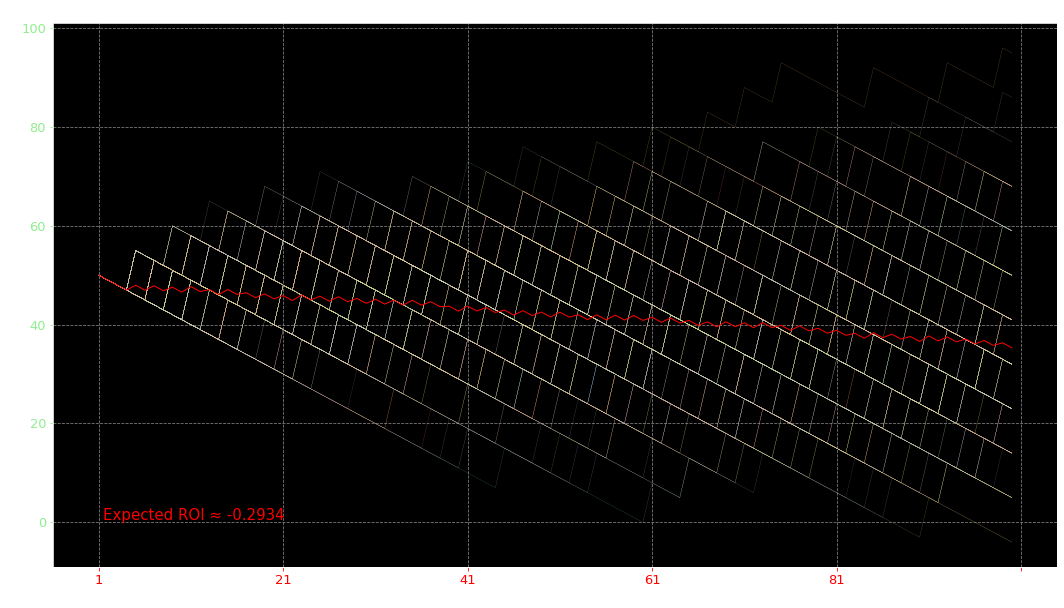

In [5]:
vs.line_plot(df1, E_V1, "Toss No°", "Capital", E_V1.iloc[0][0], E_V1.iloc[-1][0], sim)[0]

In [13]:
#Commit Coin Game & Plots in Dependencies #################################################################################################################################################################################################################

In [9]:
#Probabilities of winning and losing.
WL1=pd.DataFrame((((df1.iloc[:,-1]>50).value_counts())/sim).rename({True: "Wins", False: "Losses"}))
WL1.rename(columns={200: 'F_Capital'}, inplace=True)
WL1

,199
Losses,0.485
Wins,0.015


*Probabilities:*

In [ ]:
#Tosses taken to win
unique, counts = np.unique((df1.T.diff()==8).sum(), return_counts=True)
df1_tosses=pd.DataFrame({'Wins': unique, 'frequency': counts}).set_index('Wins')
df1_tosses

*Tosses to Win:*

In [ ]:
#Bar plot of tosses to win.
df1_tosses.plot.bar(figsize = (12, 8), xlabel = "Wins", ylabel = "frequency",
                     title = "Wins per 100 tosses in simulations", color = 'teal')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Show Mean and Mode in dataframe
print("The average number of winning events per game is:", (df1.T.diff()==8).sum().mean()) 
pd.DataFrame([(df1.T.diff()==8).sum().mean(),(df1.T.diff()==8).sum().mode()[0]], index=['Mean', 'Mode']).rename(columns={0: 'E (V)'}) #Mean and Mode values.

In [ ]:
#Final Capital of simulations > Initial Capital probability.
WL1=pd.DataFrame((((df1.iloc[:,-1]>50).value_counts())).rename({True: "Wins", False: "Losses"}))
WL1.rename(columns={100: 'Prob.'}, inplace=True)
WL1

###### Prob. of tossing >= 10 times?

In [ ]:
ten = (pd.DataFrame((df1.T.diff()==8).sum()>=10)) #Winning Events with >=10 tosses for simulations
ten = ten[ten==True].count()[0]/10000 #Prob.
print("The probability that the player wins in 10 tosses or more is:", ten)

###### Prob. of tossing < 5 times?

In [ ]:
five = (pd.DataFrame((df1.T.diff()==8).sum()<=5)) #Winning Events with >=10 tosses for simulations
five = five[five==True].count()[0]/10000 #Prob.
print("The probability that the player losses in 5 tosses or less is:", five)

#### **Game 2:** *1,000,000 Flips for 100 coin tosses games each with $50 Capital*

As faster processing times are preferred, instead of doing $n_{sim}=10000$ simulations many times or just once for calculations,<br>
we will evaluate if doing many more simulations ($n_{sim}=1000000$), deliver different and therefore more accurate results or not. 

In [ ]:
#Simulate 1000000 games of 150 coin tosses each with given variables (see function).
df2 = coin_game_sim(50, 1, 100, 8, 0, 1000000)
df2.index = df2.index + 1
df2.head(8)

In [ ]:
df2.tail(8)

In [ ]:
#Call hist_plot function
hist_plot(df2.iloc[:,-1], "Capital" , "frequencies", 100, 1000000, 0, "brown")

In [ ]:
#Describe the final capital of the simulations.
desc2 = pd.DataFrame(df2.iloc[:,-1].describe())
desc2.rename(columns={150: 'F_Capital'}, inplace=True)
desc2

*¿What is your Expected Value of $ (Won/Lost)?*

In [ ]:
#Mean and Mode of simulations Final Capital.
mean2 = df2.iloc[:,-1].mean()
mode2 = df2.iloc[:,-1].mode()[0]
print("The Expected Value of the capital after", 100, "tosses is: -", mean2)
pd.DataFrame({'Mean': [mean2], 'Mode': [mode2]}).T.rename(columns={0: 'E($) Loss'})

<br> *¿What is the probability of winning?*

If we remember correctly, just 10000 simulations once delivered the following results: 

In [ ]:
WL1

If we compare Final_Capital in 1,000,000 simulations, we can conclude 10,000 simulations once are just enough to evaluate Expected Values & Probabilities. 

In [ ]:
#Probability that the Final Capital is positive.
WL2=pd.DataFrame((((df2.iloc[:,-1]>50).value_counts())/1000000).rename({True: "Wins", False: "Losses"}))
WL2.rename(columns={100: 'F_Capital'}, inplace=True)
WL2

##### 2. Dices Game. (5 points)
The dices game requires the player to roll two dice one or more times until a decision is reached as to whether he (or she) wins or loses.<br>
He wins if the first roll results in a sum of 7 or 11 or, alternatively, if the first sum is 4, 5, 6, 8, 9 or 10 and the same sum reappears before a sum of 7 appears.<br>
Conversely, loses if the first roll results in a sum of 2, 3 or 12 or, alternatively, if the first sum is 4, 5, 6, 8, 9 or 10 and a sum of 7 after the first addition it reappears.

In [ ]:
def dice_game(initial_cap, bet, prize, n_dice):
    """Simulates a game of rolling 2 dices, where the player bets on their resulting sum.
    The player wins if the sum is 7, 11 or if re rolling sum reappears for the next throw,
    loses if the sum is 2, 3 or 12 and re rolls if the sum is 4, 5, 6, 8, 9 or 10 until he wins or losses.
    Parameters
    ----------
    initial_cap : int
        The initial capital of the player.
    bet : int
        The amount of money that the player bets on each coin toss.
    prize : int
        The amount of money that the player wins if the event occurs.
    n_dice : int
        The number of times the dice is rolled.
    Returns
    -------
    capital : numpy.ndarray
        The capital of the player after each game played.
    """
    #Creation of 2 random vectors of dices with results from 1 to 6 as integers.
    dice_1 = np.random.randint(1,7,n_dice) 
    dice_2 = np.random.randint(1,7,n_dice) 
    sum = dice_1 + dice_2 
    
    #Vectors of zeros for filling.
    capital = np.zeros(n_dice) 
    
    #Variables at game start.
    capital[0] = initial_cap 
    
    #Working with arrays outside function: nonlocal variable.
    def fill_vector(i):
        nonlocal capital 
        
        #Winning event:
        if sum[i] == 7 or sum[i] == 11:
            capital[i + 1] = capital[i] + prize 
        
        #Losing event:
        elif sum[i] == 2 or sum[i] == 3 or sum[i] == 12:
            capital[i + 1] = capital[i] - bet 

        #Reroll event:
        else:
            #Throw dices again.
            dice_1_r = np.random.randint(1,7,n_dice) 
            dice_2_r = np.random.randint(1,7,n_dice)
            sum_r = dice_1_r + dice_2_r

            #While re roll sum is not equal to last sum or last re roll sum, keep rolling.
            while sum_r[i] != sum[i-1] or sum_r[i] != sum_r[i-1]:
                #Throw dices again:
                dice_1_r = np.random.randint(1,7,n_dice) 
                dice_2_r = np.random.randint(1,7,n_dice)
                sum_r = dice_1_r + dice_2_r
            #Losing event:
            if sum_r[i] == 7:
                capital[i + 1] = capital[i] - bet 
            else:
                #Winning event:
                capital[i + 1] = capital[i] + prize 

    #Fill variables with values.          
    [fill_vector(i) for i in range(n_dice - 1)] 
    return capital

#### **Game 3:** *Simulation of 10,000 Dice Throws with $500 Capital*

1 Simulation $(n_{sim}=10000)$

In [ ]:
df3_n_sim = pd.DataFrame(dice_game(500, 3, 1, 10000))
df3_n_sim.head(8)

In [ ]:
df3_n_sim.tail(8)

In [ ]:
#Expected value of Final Capital.
E_F3Capital = df3_n_sim.iloc[-1][0]
E_Fpct = ((((df3_n_sim.iloc[-1][0]-500)/500)*100)/10000)
print("The Expected Value (µ) is: ", round(E_Fpct,4), "% per throw. For 10 games, we would expect a Final Capital of", (500 + (500*(((df3_n_sim.iloc[-1][0]-500)/500))/10000)*10), "$.")

#Call line_plot function for several simulations E(V) in each toss
line_plot(df3_n_sim, 'Rolls', 'Capital', 1, 500, E_F3Capital, 10000)
plt.legend().set_visible(False)

*Expected Values:*

In [ ]:
#Simulate 100 df3_n_sim
df3_10=pd.DataFrame([dice_game(500, 3, 1, 10) for i in range(1000)])
df3_10

In [ ]:
#Expected value of Final Capital.
E_F3Capital = df3_10.iloc[:,-1].mean()
print("The Expected Value (µ) is: +", ((E_F3Capital-500)/500)*100, "% ($", E_F3Capital,"), not a very decent RoI..")

*Probabilities:*

In [ ]:
#Make an histogram of the Final Capital after 10 throws.
hist_plot(df3_10.iloc[:,-1], "Capital" , "frequencies", 10, 1000, 500, "purple")

In [ ]:
#Final Capital of simulations > Initial Capital probability.
WL3=pd.DataFrame((((df3_10.iloc[:,-1]>500).value_counts())).rename({True: "Wins", False: "Losses"}))
WL3.rename(columns={9: 'Prob.'}, inplace=True)
WL3

In [ ]:
desc3 = pd.DataFrame(df3_10.iloc[:,-1].describe())
desc3.rename(columns={9: 'F_Capital'}, inplace=True)
desc3

In [ ]:
def diceGame(n):
    """Simulates a dice game and returns the probability of winning, losing, and rerolling events.
    Parameters
    ----------
    n : int
        Number of simulations.  
    Returns
    -------
    plot : histogram
        Histogram of probabilities of winning, losing, and rerolling events.
    """
    dice_1 = np.random.randint(1,7,n)
    dice_2 = np.random.randint(1,7,n)
    s = dice_1+dice_2
    # 7 and 11 are the only two numbers that win
    wins = [len(s[s == wins])/len(s) for wins in [7,11]]
    w=wins[0]+wins[1]
    # 2, 3, and 12 are the only three numbers that lose
    loses = [len(s[s == loses])/len(s) for loses in [2,3,12]]
    l=loses[0]+loses[1]+loses[2]
    # All other numbers are rerolled
    rep = [len(s[s == rep])/len(s) for rep in [4,5,6,8,9,10]]
    rep = np.sum([rep[i] for i in range(len(rep))])
    plt.style.use('ggplot')
    plt.title('Probability of Events in Dice Games')
    plt.bar(['Win', 'Reroll', 'Lose'], [w,rep,l])
    plt.ylabel('Probability')
    return plt.show()

In [ ]:
diceGame(10000)

#### 3. Monty Hall (5 points)
You are given the choice of three doors: behind one door is a valuable prize; Behind the other two, goats. You choose a door, let's say the No. 1, and the host, who knows what is behind the doors, opens another door, suppose the No. 3, who has a goat. Then he says to you: "Do you want to choose door No. 2?" Is there an advantage to changing the first door chosen?. Solve this problem using montecarlo and answer the following question:
What would be the probability of winning the valuable prize if you choose to change the first gate chosen?

In [ ]:
# Simulations
n = 10000

# Initialize 
doors_2 = 0
doors_3 = 0

# Simulation
for i in range(n):
    doors = ['goat', 'prize', 'goat']
    # Change the results
    np.random.shuffle(doors)
    # Random choice
    choice_3 = np.random.randint(0, 2)
    # Removal of door containing a goat
    goat_X = np.random.choice([i for i in range(len(doors)) if doors[i] == 'goat' and i != choice_3])
    doors_remaining = [0, 1, 2]
    doors_remaining.remove(choice_3) # Elimination of choice with 3 doors
    doors_remaining.remove(goat_X) # Goat removal
    choice_2 = doors_remaining[0] # Choice resulting from having 2 doors
    # Count hits with 3 and 2 doors after change of choice.
    if doors[choice_3] == 'prize':
        doors_3 += 1
    elif doors[choice_2] == 'prize':
        doors_2 += 1
        
# Histogram of probabilities
plt.style.use('classic')
plt.bar(['Win Prob.', 'Prob. removing a goat.'],\
        [doors_3 / n, doors_2 / n], width=0.5)
plt.ylabel('Probability')
plt.show()

In [ ]:
print('The probability of opening the door containing the prize is:', doors_3 / n,
      '. If a door is removed by containing a goat, the new. chance of winning is:', doors_2 / n)

#### 4. Triangles Game (5 points)
Three uniformly random points are chosen from the perimeter of a unit circle. <br>
Use Monte Carlo simulation to generate triangles. <br>
¿what is the probability of randomly generating acute triangles?

In [ ]:
#Monte Carlo simulation to find the probability that the points form an acute triangle, what is the probability of randomly generating acute triangles?
def triangle(n):
    """Simulates a triangle and returns the probability of being acute.
    Parameters
    ----------
    n : int
        Number of simulations.  
    Returns
    -------
    plot : histogram
        Histogram of probabilities of being acute.
    """

    acute = 0
    for i in range(n):
        x = np.random.randint(1, 100, 3)
        y = np.random.randint(1, 100, 3)
        a = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
        b = np.sqrt((x[2] - x[1])**2 + (y[2] - y[1])**2)
        c = np.sqrt((x[2] - x[0])**2 + (y[2] - y[0])**2)
        if a**2 + b**2 > c**2 and a**2 + c**2 > b**2 and b**2 + c**2 > a**2:
            acute += 1

    return print("The probability of forming an acute triangle is:", acute / n)

triangle(10000)